In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sys
np.set_printoptions(threshold=sys.maxsize)

# Read Data

## Problem : We Must Detect Presence or absence of cardiovascular disease

### 1) Undrestand The Type Of Data
### 2) Undrestand The Null Value
### 3) Clean Data
### 4) Underestand The Corr Between Columns
 

In [2]:
df1 = pd.read_csv('Cardiovascular_Disease_dataset.csv',sep=";")
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df1 = df.drop('id', axis=1)

NameError: name 'df' is not defined

### age is days divide to 365 

In [ ]:
df1['age'] = round(df1['age'] / 365)

**We Don't Have Null Value But We Have Unbeleiveble Values** 

In [ ]:
df1[(df1['ap_hi'] > 180 ) | (df1['ap_lo'] > 120)]

### Our ap_lo Columns it Does Not Have True Value's becauce 1000 or 800 
### let's Solve This problem

In [ ]:
df1['ap_lo'].describe()

In [ ]:
df1['ap_hi'].describe()

### Because We Have Age More Than 30 The ap_lo Values Must Above 76 And ap_hi Be 108

In [5]:
df1['ap_lo']  = df1['ap_lo'].apply(lambda x: (np.nan if x <= 76 else x))
df1['ap_lo']  = df1['ap_lo'].apply(lambda x: (np.nan if x >= 130 else x))

In [6]:
df1['ap_lo'].describe()

count    55236.000000
mean        84.612753
std          7.044756
min         77.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        126.000000
Name: ap_lo, dtype: float64

In [7]:
df1['ap_hi']  = df1['ap_hi'].apply(lambda x: (np.nan if x <= 108 else x))
df1['ap_hi']  = df1['ap_hi'].apply(lambda x: (np.nan if x >= 200 else x))

In [8]:
df1['ap_hi'].describe()

count    65739.000000
mean       128.568536
std         15.354328
min        109.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64

In [9]:
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,2,18857,1,165,64.0,130.0,NaN,3,1,0,0,0,1
3,3,17623,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,4,17474,1,156,56.0,NaN,NaN,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180.0,90.0,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135.0,80.0,1,2,0,0,0,1


<AxesSubplot:xlabel='height'>

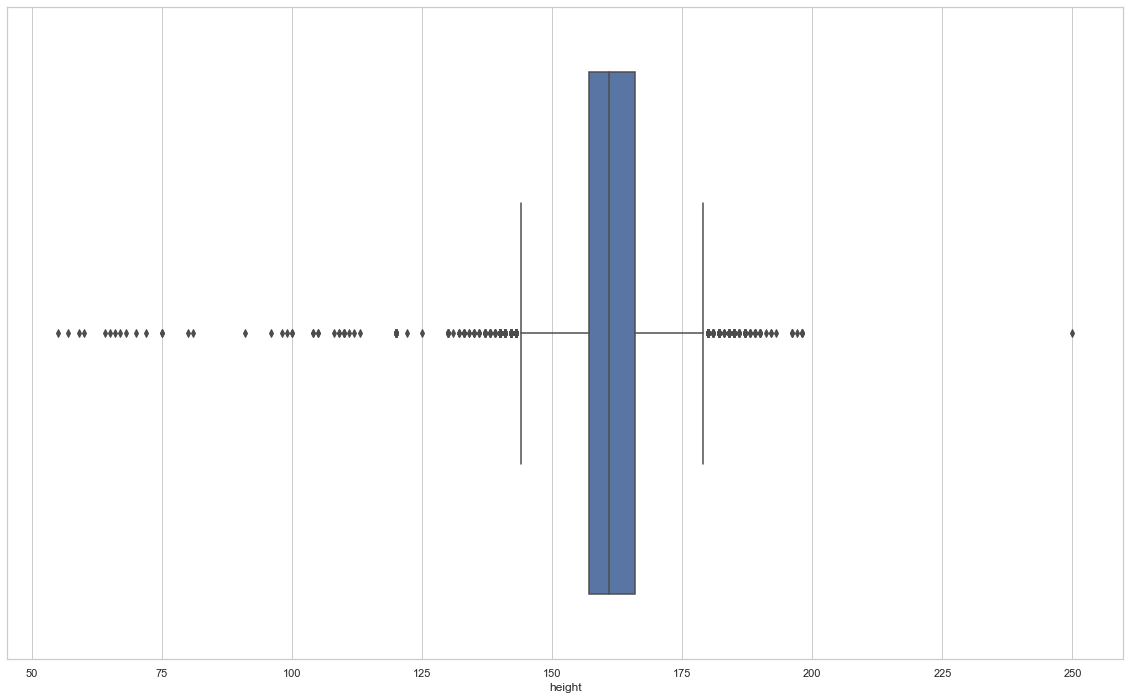

In [10]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 1]['height'],  orient='H')

#df1[df1['gender'] == 1]['height'].plot(kind='box', figsize=(20, 12))

<AxesSubplot:xlabel='weight'>

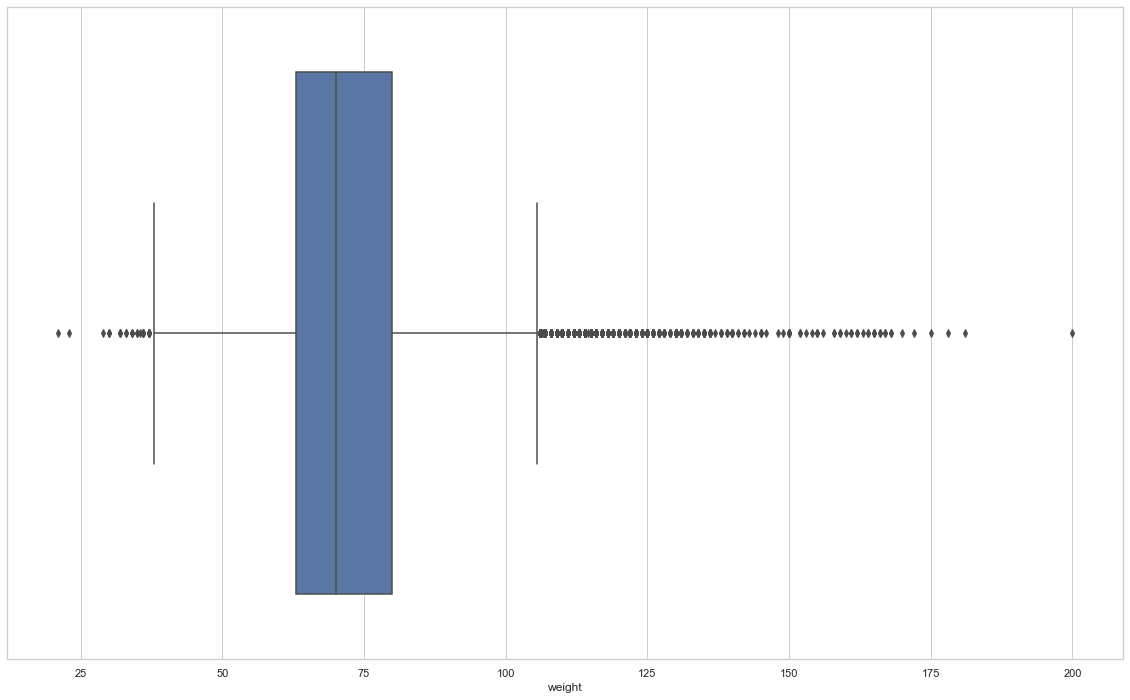

In [11]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 1]['weight'],  orient='H')

<AxesSubplot:xlabel='height'>

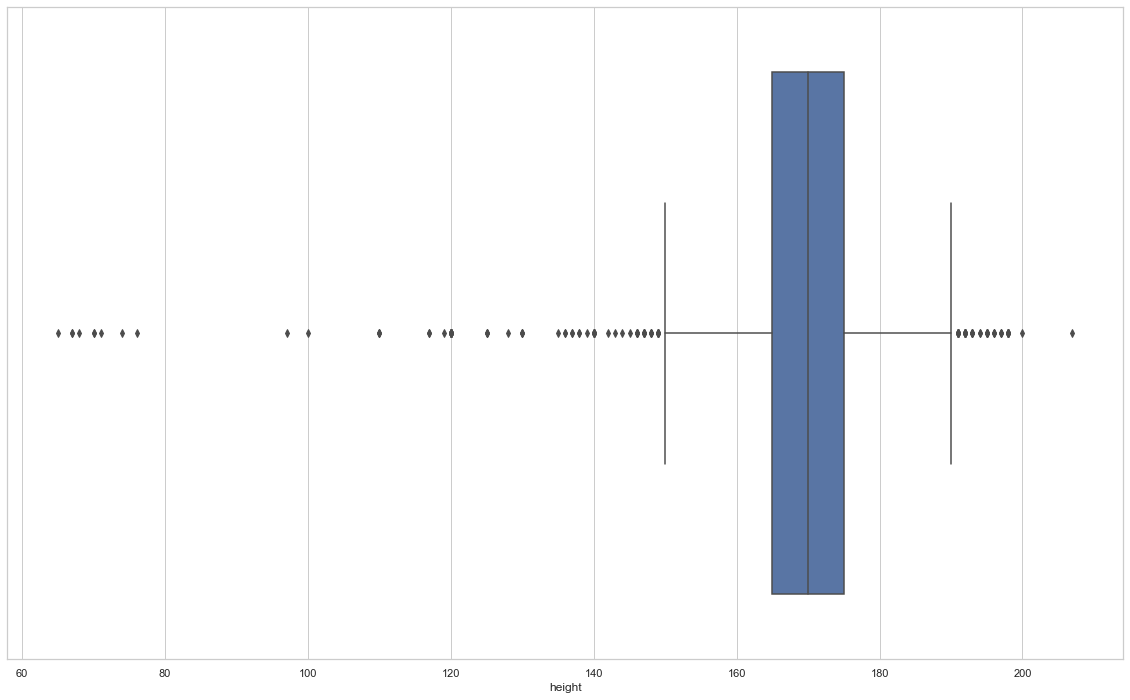

In [12]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 2]['height'],  orient='H')


<AxesSubplot:xlabel='weight'>

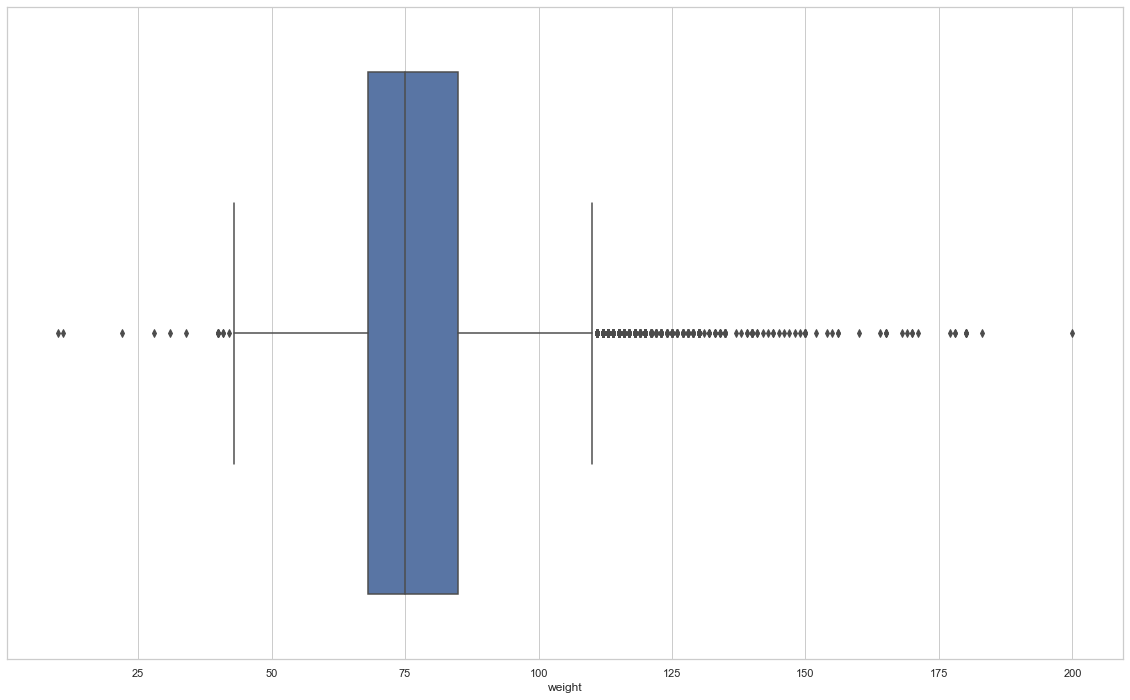

In [13]:
plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df1[df1['gender'] == 2]['weight'],  orient='H')


#### Now Let's Clean The Height And Weight For Both Men And Women :

In [16]:
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,0,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69997,99996,19066,0,183,105.0,180.0,90.0,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135.0,80.0,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120.0,80.0,2,1,0,0,1,0


In [17]:
df1.gender[df1.gender == 1] = 1
df1.gender[df1.gender == 2] = 0

<ipython-input-17-54238dda1e94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender[df1.gender == 1] = 1
<ipython-input-17-54238dda1e94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender[df1.gender == 2] = 0


In [18]:
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,0,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69997,99996,19066,0,183,105.0,180.0,90.0,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135.0,80.0,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120.0,80.0,2,1,0,0,1,0


In [19]:
#Clean Height For Both: 
df1['height'] = df1['height'].apply(lambda x: (np.nan if x < 150 else x))
df1['height'] = df1['height'].apply(lambda x: (np.nan if x > 190 else x))

In [20]:
df1.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,0,168.0,76.0,120.0,80.0,1,1,1,0,1,0
69996,99995,22601,1,158.0,126.0,140.0,90.0,2,2,0,0,1,1
69997,99996,19066,0,183.0,105.0,180.0,90.0,3,1,0,1,0,1
69998,99998,22431,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1
69999,99999,20540,1,170.0,72.0,120.0,80.0,2,1,0,0,1,0


In [21]:
#Clean Weight For Both: 
df1['weight'] = df1['weight'].apply(lambda x: (np.nan if x < 63 else x))
df1['weight'] = df1['weight'].apply(lambda x: (np.nan if x > 110 else x))

In [22]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       68399 non-null  float64
 4   weight       55044 non-null  float64
 5   ap_hi        65739 non-null  float64
 6   ap_lo        55236 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 6.9 MB


### Now We Have Null value 
### We Can Use mean 

In [23]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [24]:
x['cholesterol'].value_counts()
#1: normal, 2: above normal, 3: well above normal |

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [25]:
x['gluc'].value_counts()
# 1: normal, 2: above normal, 3: well above normal

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [26]:
x['gender'].value_counts()
# 0 - women, 1 - men

1    45530
0    24470
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender'>

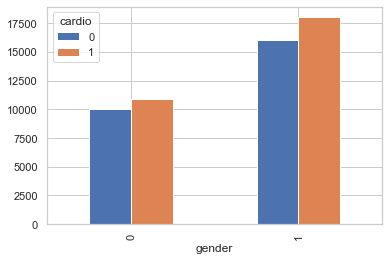

In [27]:
df1.pivot_table(index='gender', columns='cardio',values='weight' , aggfunc='count').plot(kind='bar')

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       68399 non-null  float64
 4   weight       55044 non-null  float64
 5   ap_hi        65739 non-null  float64
 6   ap_lo        55236 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 6.4 MB


In [29]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,0.650429,0.476838,0.0,0.00,1.0,1.00,1.0
height,68399.0,164.797278,7.406452,150.0,160.00,165.0,170.00,190.0
weight,55044.0,77.404128,10.785533,63.0,69.00,75.0,84.00,110.0
ap_hi,65739.0,128.568536,15.354328,109.0,120.00,120.0,140.00,199.0
ap_lo,55236.0,84.612753,7.044756,77.0,80.00,80.0,90.00,126.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [30]:
x.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
x1 = imputer.fit_transform(x)
x1 = pd.DataFrame(x1, columns=x.columns)
x1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.0,18393.0,0.0,168.0,94.666667,110.000000,80.000000,1.0,1.0,0.0,0.0,1.0
1,1.0,20228.0,1.0,156.0,85.000000,140.000000,90.000000,3.0,1.0,0.0,0.0,1.0
2,2.0,18857.0,1.0,165.0,64.000000,130.000000,86.666667,3.0,1.0,0.0,0.0,0.0
3,3.0,17623.0,0.0,169.0,82.000000,150.000000,100.000000,1.0,1.0,0.0,0.0,1.0
4,4.0,17474.0,1.0,156.0,69.333333,136.666667,90.000000,1.0,1.0,0.0,0.0,0.0


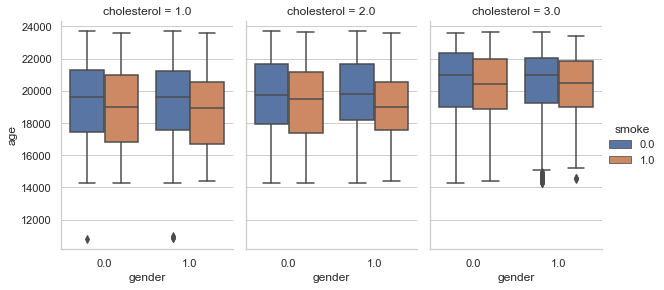

In [32]:
sns.catplot(x='gender', y='age',
                hue='smoke',col='cholesterol',
                data=x1, kind="box",
                height=4, aspect=.7);

In [33]:
#sns.pairplot(x1)

In [34]:
#plt.figure(figsize=(20, 12))
#sns.heatmap(x1.corr(), annot=True)

In [35]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  float64
 1   age          70000 non-null  float64
 2   gender       70000 non-null  float64
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  float64
 8   gluc         70000 non-null  float64
 9   smoke        70000 non-null  float64
 10  alco         70000 non-null  float64
 11  active       70000 non-null  float64
dtypes: float64(12)
memory usage: 6.4 MB


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer(transformers=[('cat', MinMaxScaler(), [0, 2, 3, 4, 5])] ,remainder='passthrough', n_jobs=-1)
x2 = ct.fit_transform(x1)

In [37]:
x2 = pd.DataFrame(x2, columns=x.columns)
x2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.00000,0.0,0.450,0.673759,0.011111,18393.0,80.000000,1.0,1.0,0.0,0.0,1.0
1,0.00001,1.0,0.150,0.468085,0.344444,20228.0,90.000000,3.0,1.0,0.0,0.0,1.0
2,0.00002,1.0,0.375,0.021277,0.233333,18857.0,86.666667,3.0,1.0,0.0,0.0,0.0
3,0.00003,0.0,0.475,0.404255,0.455556,17623.0,100.000000,1.0,1.0,0.0,0.0,1.0
4,0.00004,1.0,0.150,0.134752,0.307407,17474.0,90.000000,1.0,1.0,0.0,0.0,0.0


In [38]:
x2.iloc[:, 5:11] = x2.iloc[:, 5:11].astype('object')
x3 = pd.get_dummies(x2)

In [39]:
x3

,id,age,gender,height,weight,active,ap_hi_10798.0,ap_hi_10859.0,ap_hi_10878.0,ap_hi_10964.0,...,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0,gluc_1.0,gluc_2.0,gluc_3.0,smoke_0.0,smoke_1.0,alco_0.0,alco_1.0
0,0.00000,0.0,0.450,0.673759,0.011111,1.0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,0.00001,1.0,0.150,0.468085,0.344444,1.0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,0.00002,1.0,0.375,0.021277,0.233333,0.0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
3,0.00003,0.0,0.475,0.404255,0.455556,1.0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0.00004,1.0,0.150,0.134752,0.307407,0.0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.99994,0.0,0.450,0.276596,0.122222,1.0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
69996,0.99996,1.0,0.200,0.354610,0.344444,1.0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
69997,0.99997,0.0,0.825,0.893617,0.788889,0.0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
69998,0.99999,1.0,0.325,0.191489,0.288889,0.0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [40]:
x3.shape

(70000, 8179)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=1)

In [42]:
#Without Using GridSearchCV: 
rn = RandomForestClassifier(max_depth=5, n_estimators=1700, n_jobs=-1, criterion='entropy')
rn.fit(x_train, y_train)
print(rn.score(x_train, y_train))
predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))

0.7006734693877551
0.694952380952381


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
print(cm)

[[8487 1865]
 [4541 6107]]


In [ ]:

from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [ ]:

print(accuracy_score(y_test, predict))
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
import pickle
pickle.dump(svm, open("Cardiovascular_Disease_model.sav", 'wb'))